In [1]:
# notebook import

from ipynb.fs.full.data_processing import *

In [2]:
# user input parameters

# boolean parameter to dictate whether figures are saved
save = True

# boolean parameter to dictate whether figures are plotted with the point at start point
start = False

# boolean parameter to dictate whether figures are plotted with the relative temperature
temp = False

# number over which the plot of temperature will be averaged 
temp_avg = 10

# number over which the plot of correlation will be averaged 
correlation_avg = 10

# list of colors corresponding to specific wells used in figures
colors = [0, 'sienna', 0, 'tomato', 'orange', 'darkgoldenrod', 'yellowgreen', 'limegreen',  0, 'teal', 'deepskyblue', 'royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink']

In [3]:
# function declaration

# input: dictionary mapping each well number to its list of correlations between GFP and RFP over time
# output: None (plots each well's correlation between GFP and RFP as a function of time)
def plot_pearson_all(correlation_dict, x_temp=None, y_temp=None): 
    
    for well in correlation_dict:
        
        if start:
            x, y = avg_plot(timestep_scaled, correlation_dict[well]['pearson'], correlation_avg)
            plt.plot(x, y, label=f'{well}', color=colors[int(well)])
        elif not start:
            x, y = avg_plot(timestep_scaled_no_start, get_no_start(correlation_dict[well]['pearson']), correlation_avg)
            plt.plot(x, y, label=f'{well}', color=colors[int(well)])
        
    if temp:
        plt.plot(x_temp, y_temp, color='black', label="Relative Temperature")
    if start:
        plt.axvline(start_plot, color='gray', linestyle='--', label=f'Start')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Pearson correlation between GFP and RFP')
    plt.xlabel('Time (min)')
    plt.ylabel('Pearson Correlation')
    
    if save: 
        plt.savefig(results_fpath + correlation_ext + f'/pearson_all_plots/pearson_all_{correlation_avg}{ext}.png', dpi=300,  bbox_inches='tight')
        
    plt.show()
    return


In [5]:
# `main()` function declaration

# intended use in coordination with `pearson_correlation.ipynb`
# requires: import of `data_processing.ipynb` and user input parameters specified above
# output: None (reads data files and produces plots of Pearson correlation between GFP and RFP)

def main():
    
    # declare global variable ext for filepath of saved figure
    global ext
    ext = ''
    if temp:
        f'_temp_{temp_avg}'
    if start:
        ext += '_start'
    elif not start:
        ext += '_no_start'
        
    # find .csv data files
    files = find_data_files(results_fpath + correlation_ext, 'pearson_*.csv')
    
    # create dictionary mapping each well to its list of correlations
    correlation_dict = create_dataframe_dict(files, 'pearson_(.+?).csv')
    
    # plot
    if temp:
        # scale temperature by input factor
        scaled_temp = scale(temp_series, correlation_dict['14']['pearson'])
        x_temp, y_temp = avg_plot(temp_mins, scaled_temp, temp_avg)
        
        if start:
            plot_pearson_all(correlation_dict, x_temp, y_temp)
        elif not start:
            plot_pearson_all(correlation_dict, get_no_start(x_temp), get_no_start(y_temp))
    
    else:
        plot_pearson_all(correlation_dict)
    
    return


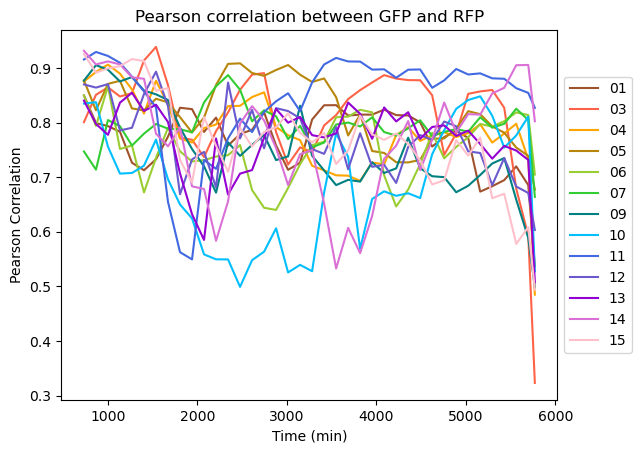

In [6]:
# call to `main()` function

main()